# Deep Packet Models Evaluation

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_application_classification_resnet_model, load_traffic_classification_resnet_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

miniconda3/envs/deep_packet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Configuration

In [2]:
# plot dpi
mpl.rcParams['figure.dpi'] = 300

# model path
application_classification_resnet_model_path = 'model/application_classification.resnet.model'
traffic_classification_resnet_model_path = 'model/traffic_classification.resnet.model'

# test data path
application_classification_test_data_path = 'train_test_data/application_classification/test.parquet'
traffic_classification_test_data_path = 'train_test_data/traffic_classification/test.parquet'

## Load Model

In [3]:
application_classification_resnet = load_application_classification_resnet_model(application_classification_resnet_model_path, gpu=True)
traffic_classification_resnet = load_traffic_classification_resnet_model(traffic_classification_resnet_model_path, gpu=True)

## Performance

In [4]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

### Application Classification

#### ResNet

In [5]:
app_resnet_cm = confusion_matrix(
    data_path=application_classification_test_data_path,
    model=application_classification_resnet,
    num_class=len(ID_TO_APP)
)

Resolving data files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 526922.61it/s]
Using custom data configuration test.parquet-2d1183c99b94bb14


Extracting data files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.66it/s]


Dataset parquet downloaded and prepared to .cache/huggingface/datasets/parquet/test.parquet-2d1183c99b94bb14/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.38s/it]


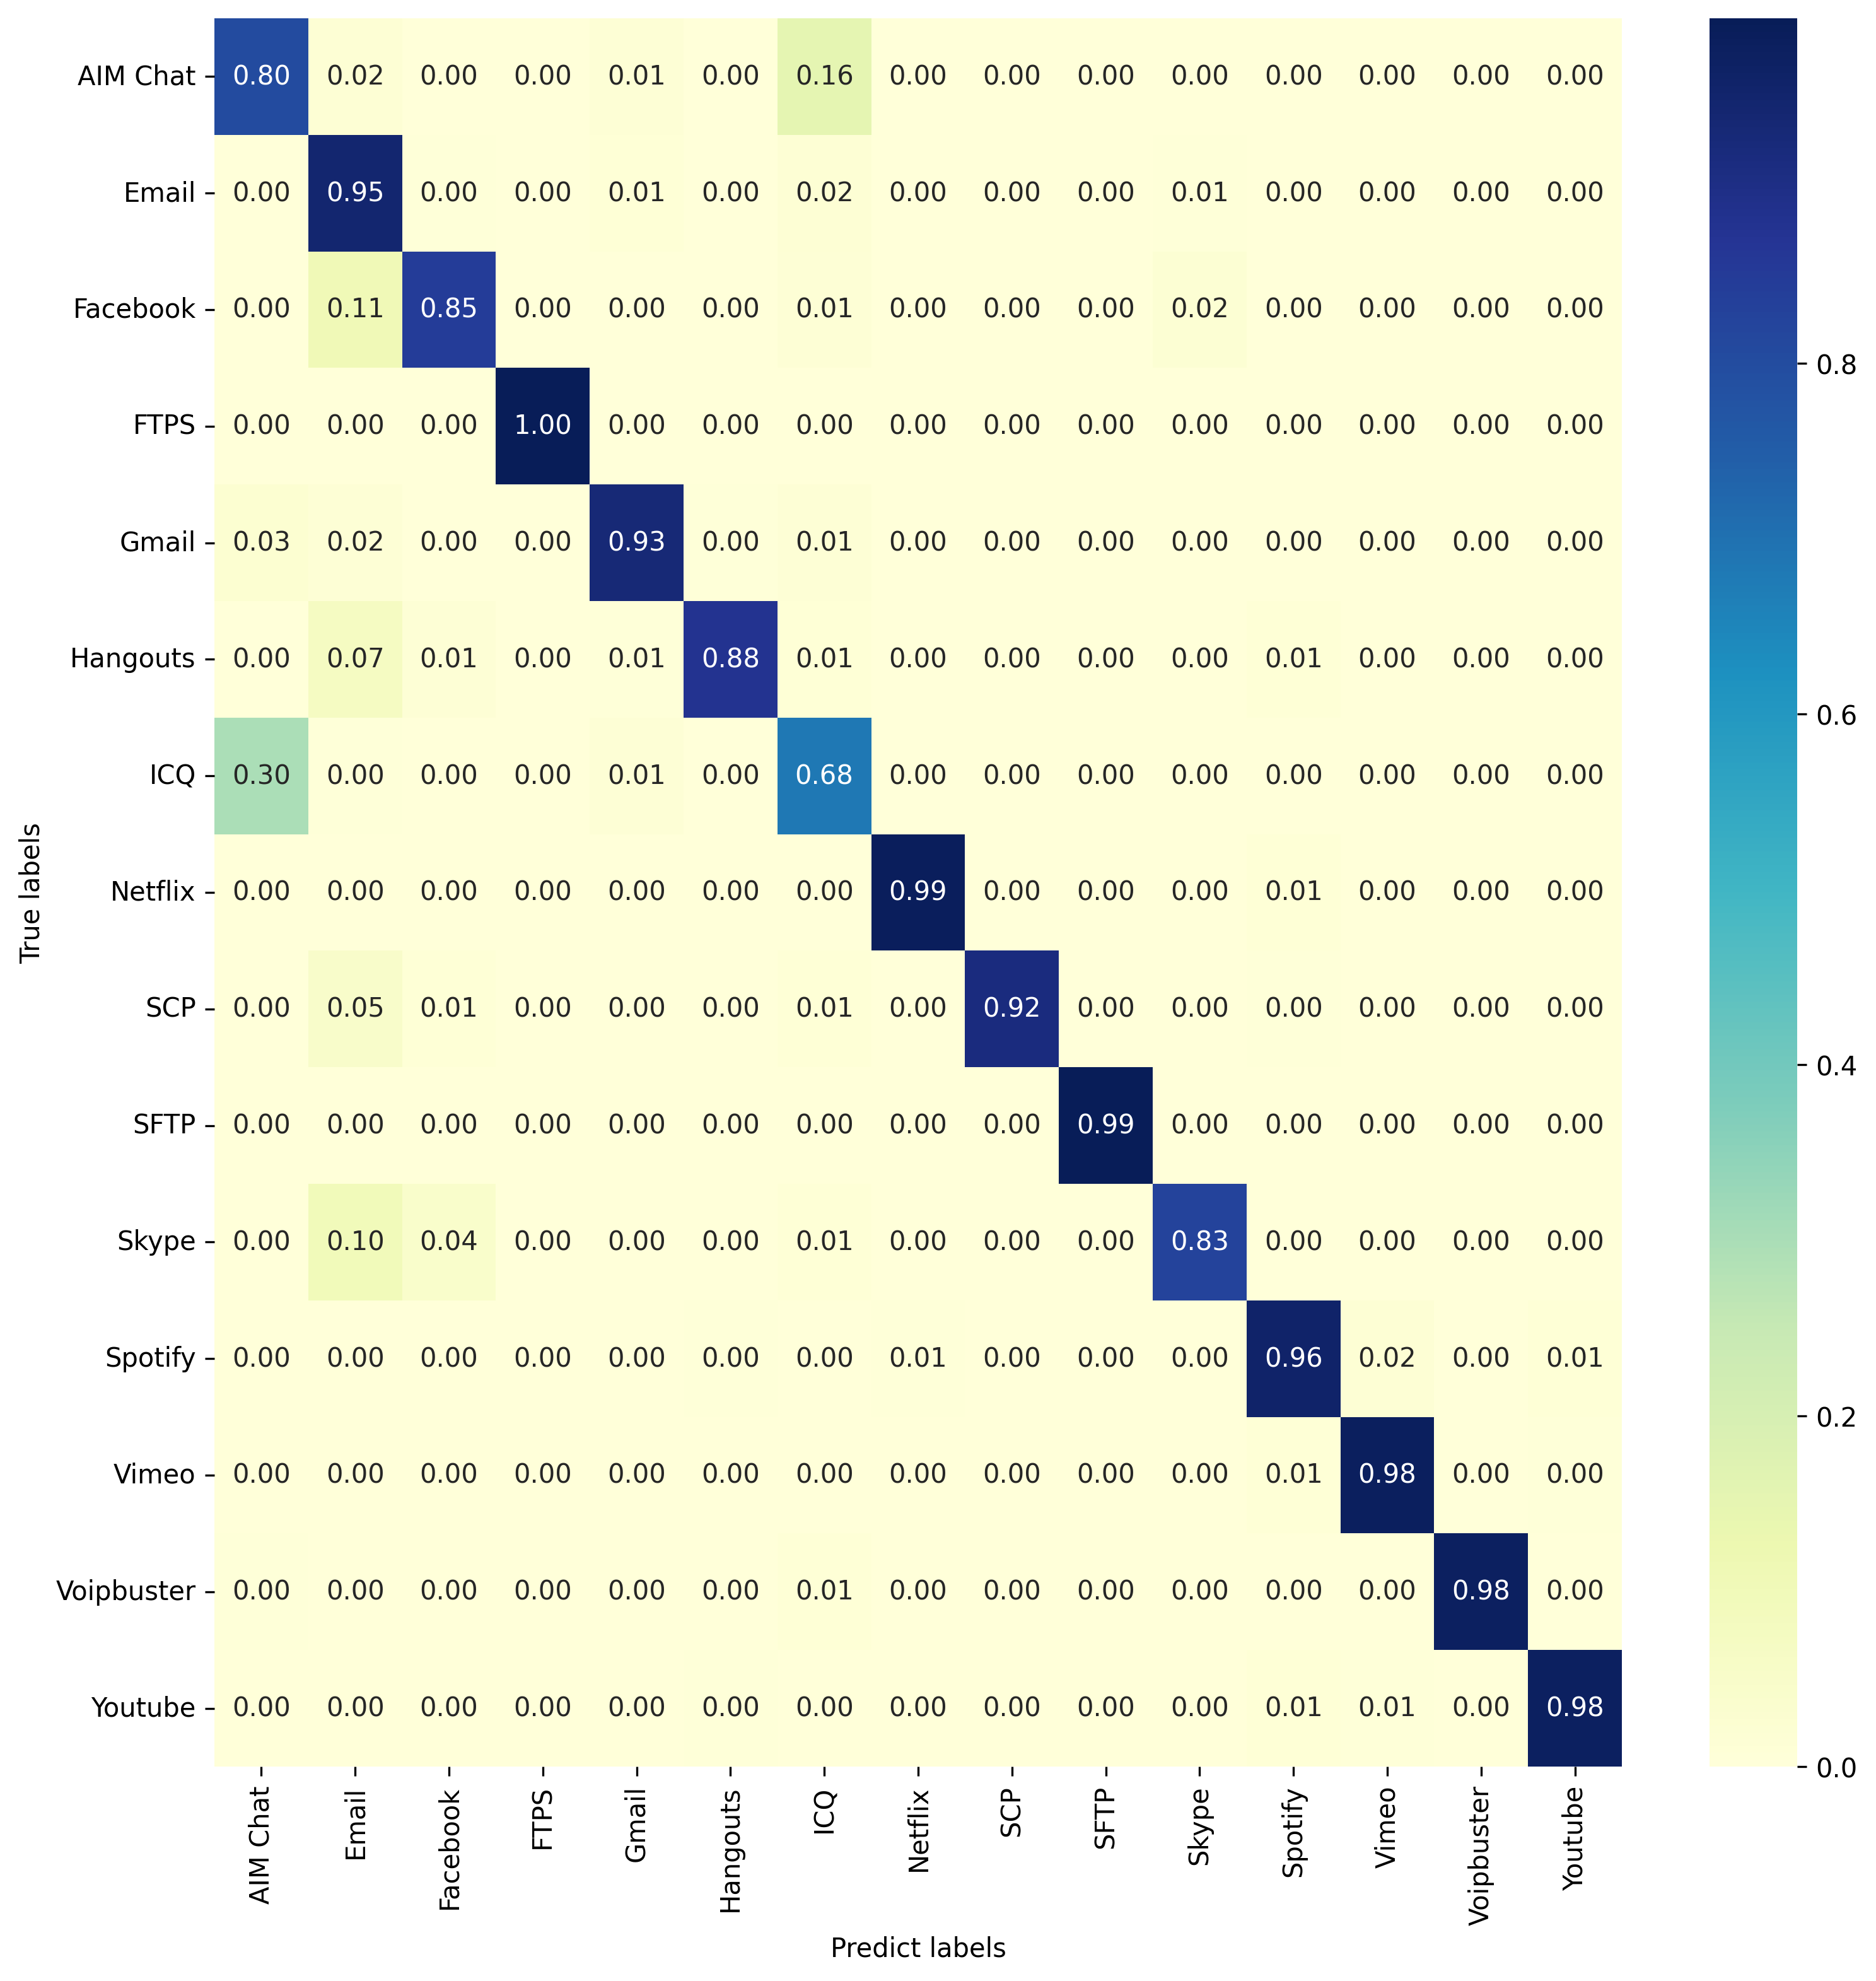

In [6]:
app_labels = []
for i in sorted(list(ID_TO_APP.keys())):
    app_labels.append(ID_TO_APP[i])

plot_confusion_matrix(app_resnet_cm, app_labels)

In [7]:
get_classification_report(app_resnet_cm, app_labels)

,label,precision,recall
0,AIM Chat,0.064274,0.803258
1,Email,0.063353,0.949415
2,Facebook,0.909246,0.846606
3,FTPS,0.999218,0.996491
4,Gmail,0.150410,0.931945
5,Hangouts,0.995251,0.877492
6,ICQ,0.016200,0.681887
7,Netflix,0.974251,0.987507
8,SCP,0.936459,0.916515
9,SFTP,0.980035,0.994973


### Traffic Classification

#### ResNet

In [8]:
traffic_resnet_cm = confusion_matrix(
    data_path=traffic_classification_test_data_path,
    model=traffic_classification_resnet,
    num_class=len(ID_TO_TRAFFIC)
)

Resolving data files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 534646.78it/s]
Using custom data configuration test.parquet-b48a529441c399a5


Extracting data files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.92it/s]


Dataset parquet downloaded and prepared to .cache/huggingface/datasets/parquet/test.parquet-b48a529441c399a5/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.17s/it]


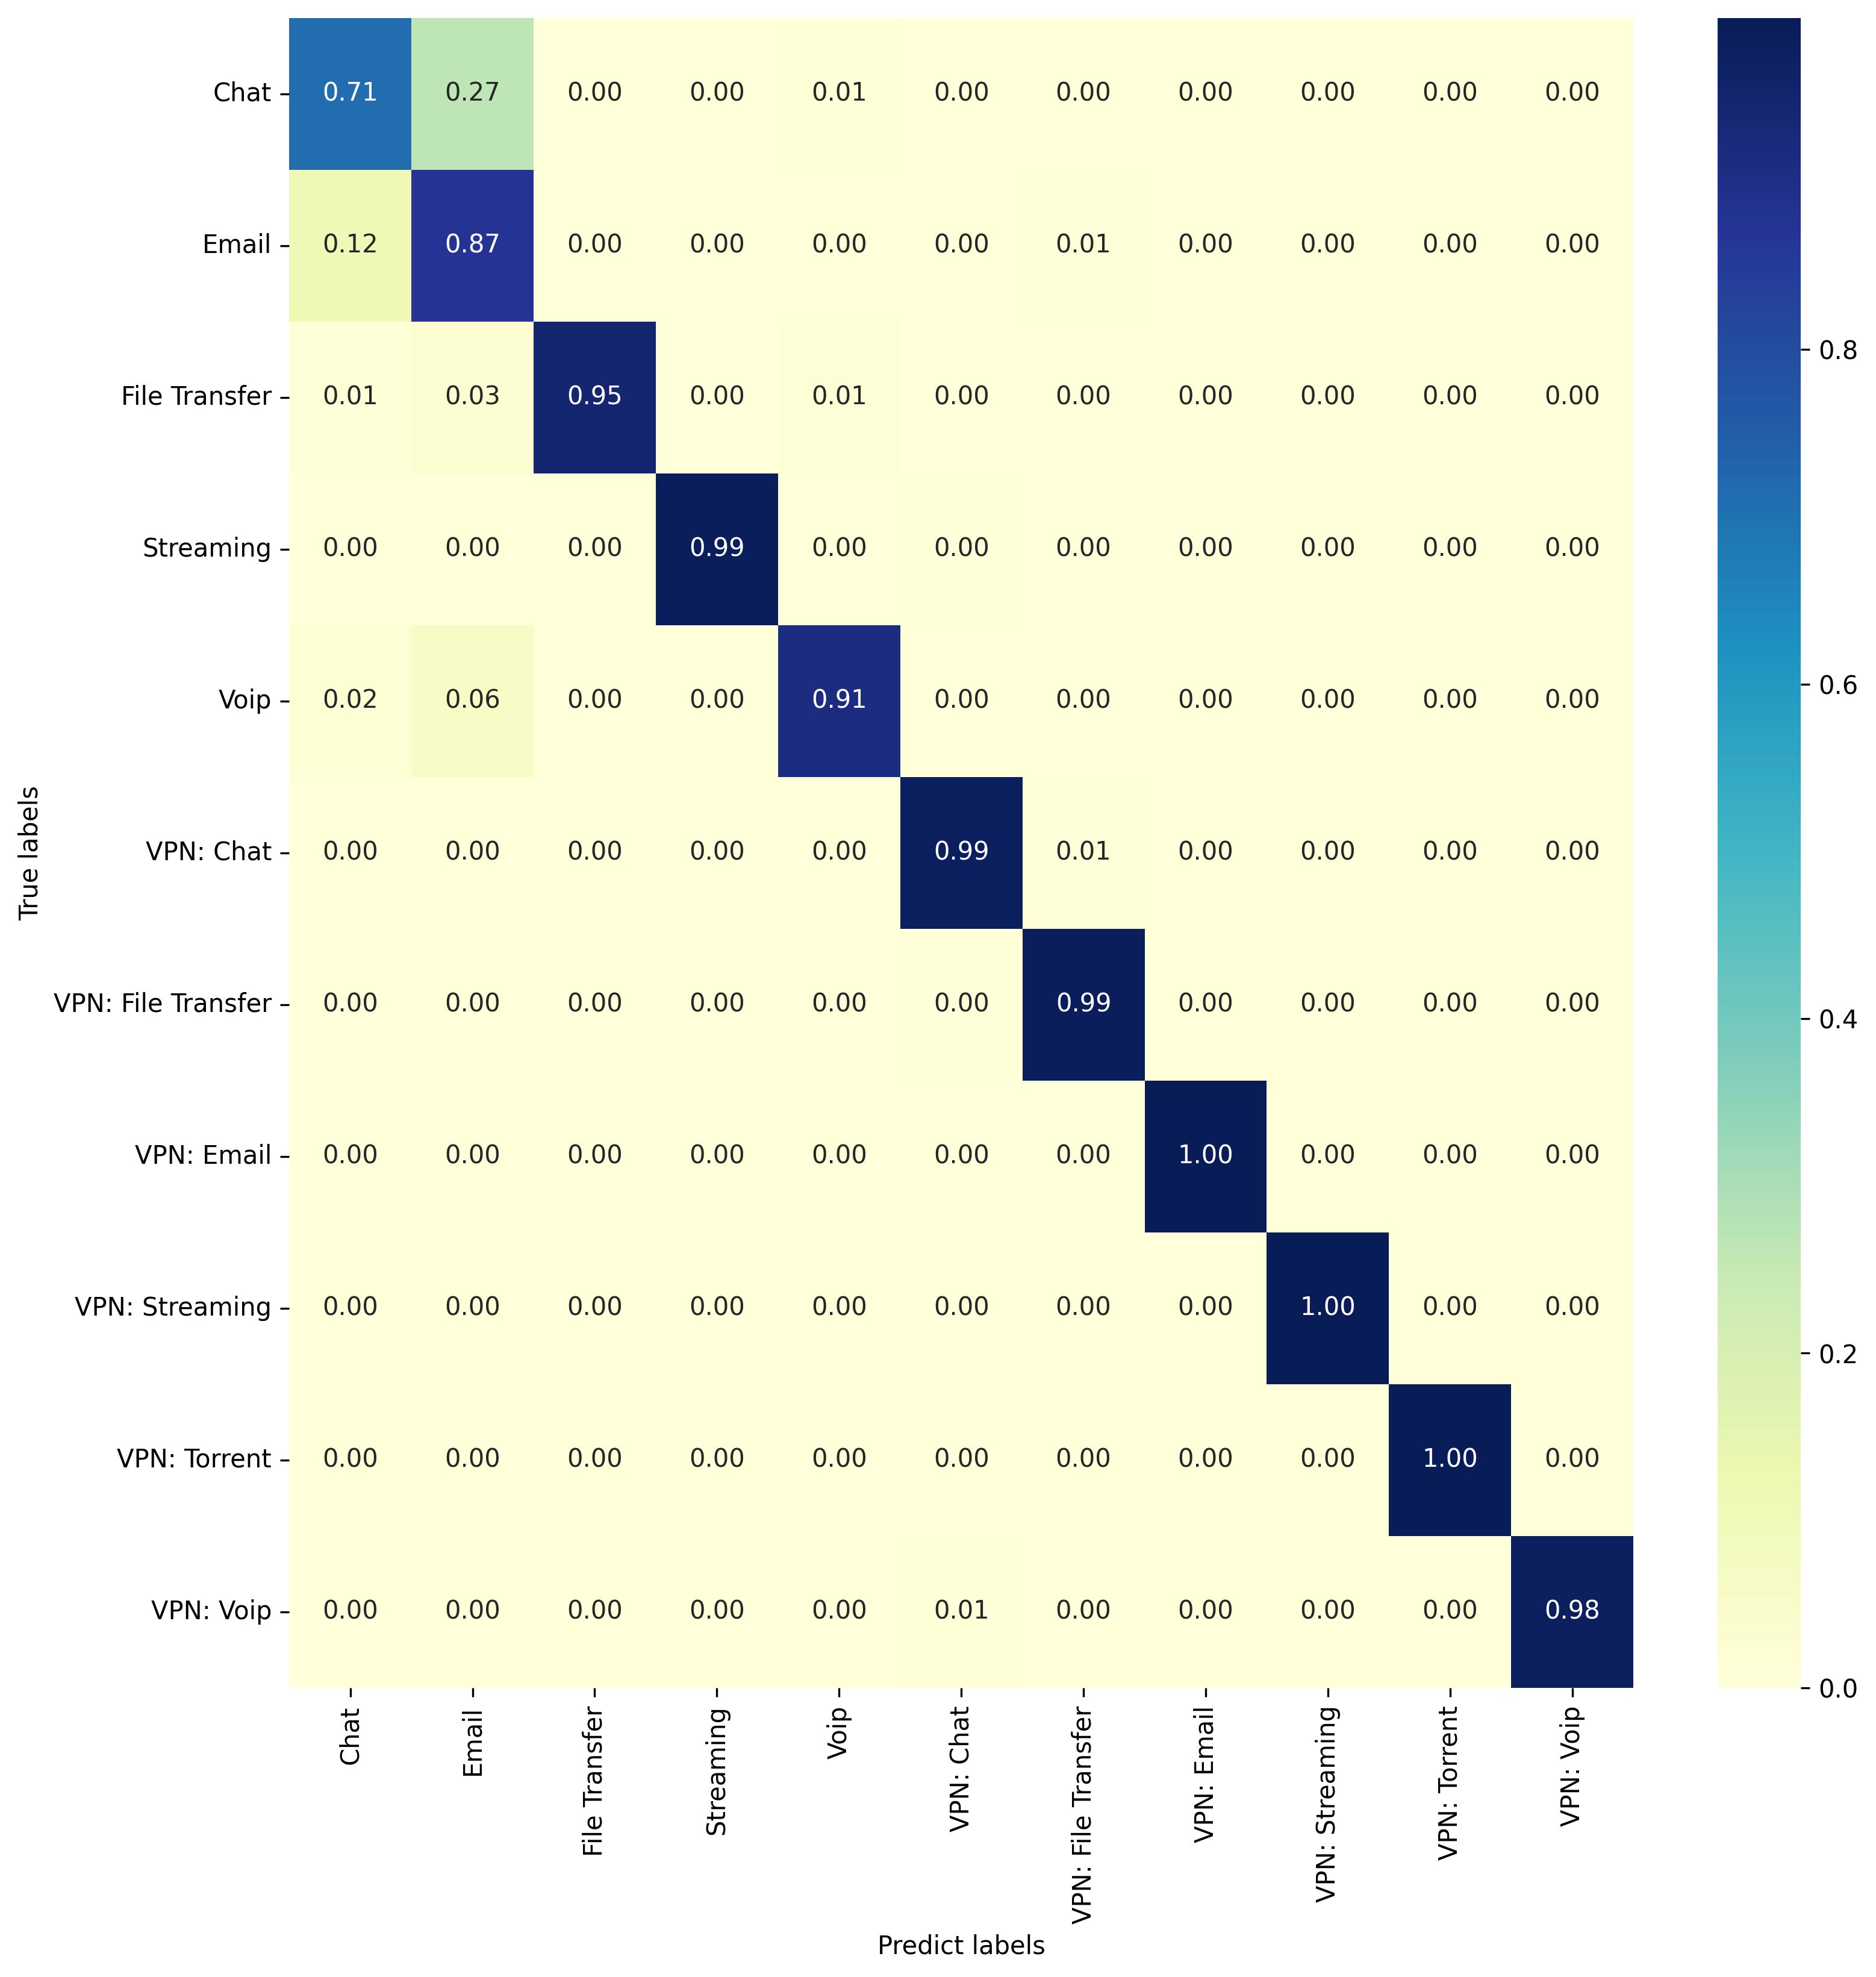

In [9]:
traffic_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    traffic_labels.append(ID_TO_TRAFFIC[i])

plot_confusion_matrix(traffic_resnet_cm, traffic_labels)

In [10]:
get_classification_report(traffic_resnet_cm, traffic_labels)

,label,precision,recall
0,Chat,0.254074,0.713096
1,Email,0.073228,0.871551
2,File Transfer,0.996289,0.950880
3,Streaming,0.957501,0.987471
4,Voip,0.990132,0.911760
5,VPN: Chat,0.448415,0.986180
6,VPN: File Transfer,0.926503,0.988260
7,VPN: Email,0.861201,0.995621
8,VPN: Streaming,0.997552,0.995333
9,VPN: Torrent,0.996790,0.998198
